In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import rich
from rich import print as pprint

%matplotlib inline

In [64]:
abcd = list("abcd")
probs = [0.3, 0.3, 0.25, 0.15]

In [65]:
def sample_char():    
    return np.random.choice(abcd, p=probs)

In [66]:
def gen_plaintext(n=5):
    return "".join(sample_char() for _ in range(n))

In [67]:
Counter(gen_plaintext(3000))

Counter({'b': 900, 'c': 748, 'd': 485, 'a': 867})

In [71]:
def gen_key():
    return {c: np.random.choice(abcd) for c in abcd}

In [76]:
key_abcd = gen_key()

In [80]:
pprint(key_abcd)

{'a': 'c', 'b': 'b', 'c': 'd', 'd': 'a'}

In [81]:
def encrypt(msg, key):
    return "".join(key[c] for c in msg)

In [84]:
pprint(encrypt("acab", key_abcd))

cdcb

### Character distribution: "matching the bars" reveals the ciphertext

In [108]:
def normalize(ctr, should_round=False, rounding=3):
    s = sum(ctr.values())
    return {k: round(cnt/s, rounding) if should_round else cnt/s for k, cnt in ctr.items()}

In [120]:
some_plaintext = gen_plaintext(3000)
some_ciphertext = encrypt(some_plaintext, key_abcd)

In [121]:
pprint(normalize(Counter(some_plaintext), should_round=3, rounding=1))

{'b': 0.3, 'a': 0.3, 'd': 0.1, 'c': 0.3}

In [122]:
pprint(normalize(Counter(some_ciphertext), should_round=3, rounding=1))

{'b': 0.3, 'c': 0.3, 'a': 0.1, 'd': 0.3}

In [123]:
pprint(key_abcd)

{'a': 'c', 'b': 'b', 'c': 'd', 'd': 'a'}

Text(0.5, 1.0, 'Plaintext character distribution')

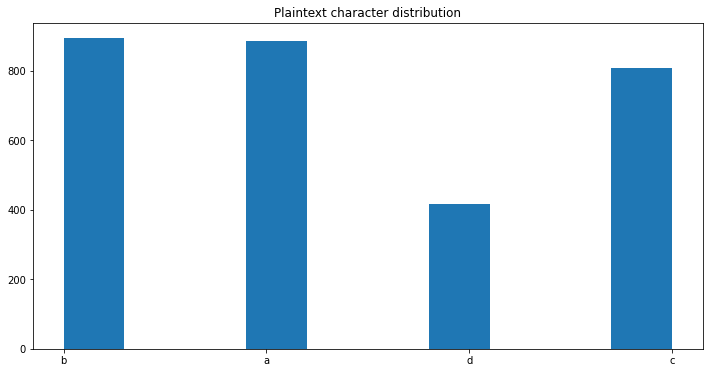

In [136]:
g = pd.Series(list(some_plaintext)).hist(grid=False, figsize=(12, 6))
g.set_title("Plaintext character distribution")

Text(0.5, 1.0, 'Ciphertext character distribution')

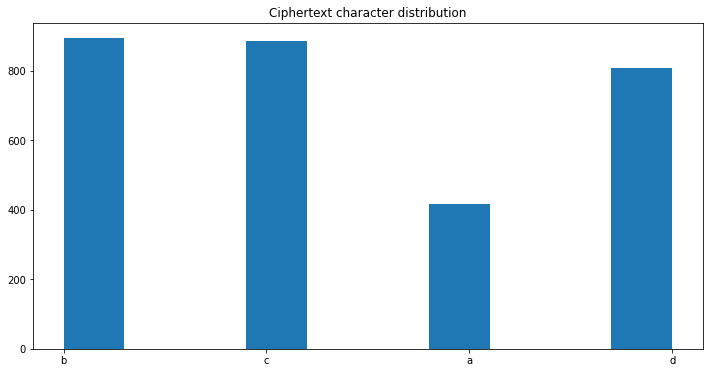

In [135]:
g = pd.Series(list(some_ciphertext)).hist(grid=False, figsize=(12, 6))
g.set_title("Ciphertext character distribution")

### Order statistic encoding

In [143]:
def frequency_encoding_key(plaintext: str) -> dict[str, int]:
    return {sym: ix for ix, (sym, _) in enumerate(Counter(plaintext).most_common())}

In [144]:
frequency_encoding_key(some_plaintext)

{'b': 0, 'a': 1, 'c': 2, 'd': 3}

In [145]:
frequency_encoding_key(some_ciphertext)

{'b': 0, 'c': 1, 'd': 2, 'a': 3}

In [148]:
def match_plaintext_ciphertext(plaintext, ciphertext):
    k_plain = frequency_encoding_key(plaintext)
    k_cipher_inv = {v: k for k,v in frequency_encoding_key(ciphertext).items()}
    return {sym: k_cipher_inv[freq] for sym, freq in k_plain.items()}

In [152]:
match_plaintext_ciphertext(some_plaintext, some_ciphertext)

{'b': 'b', 'a': 'c', 'c': 'd', 'd': 'a'}

In [153]:
key_abcd

{'a': 'c', 'b': 'b', 'c': 'd', 'd': 'a'}

In [155]:
match_plaintext_ciphertext(some_plaintext, some_ciphertext) == key_abcd

True